In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('card_data.csv')
df = df.dropna(subset=['ATK']) 
df=df.drop("Type",1)
df=df.drop("Race",1)
df=df.drop("Name",1)
df=df.drop("Attribute",1)
df=df.drop("DEF",1)
df.head()

,Level,ATK
1,3.0,1200.0
4,4.0,920.0
6,8.0,3000.0
8,3.0,1400.0
9,6.0,2100.0


In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 123)

In [8]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
y_pred = model.predict(X_test)
print ("Desempeño del modelo: ", model.score(X_test, y_test))

Desempeño del modelo:  0.5522128653360427


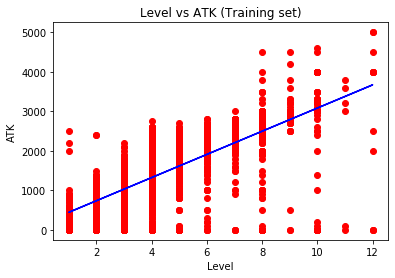

In [11]:
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_train, model.predict(X_train), color = 'blue') 
plt.title('Level vs ATK (Training set)') 
plt.xlabel('Level')
plt.ylabel('ATK')
plt.show()

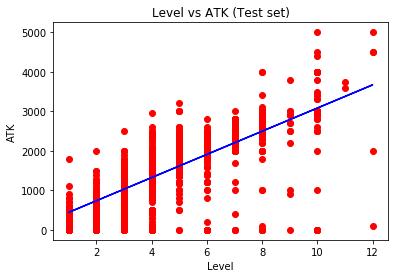

In [13]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Level vs ATK (Test set)')
plt.xlabel('Level')
plt.ylabel('ATK')
plt.show()

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [15]:

kf = KFold(n_splits=5, shuffle=True, random_state=123)
cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
print("Desepeño de cross-validation con 5 volúmenes:", cv_scores.mean())

Desepeño de cross-validation con 5 volúmenes: 0.5084608982546607
